In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
import pandas as pd

In [955]:
def init_population(size, length) -> np.ndarray:
    return np.random.randint(low=0, high=2, size=(size, length))

In [956]:
def fitness(pop: np.ndarray) -> np.ndarray:
    return np.sum(pop, axis=1)

In [1669]:
def flip_bit(pop, r=0.5) -> np.ndarray:
    b4 = fitness(pop)
    row, col = pop.shape
    size = np.min([np.max([int(row*r), 1]), row])
    row_indices = np.random.choice(np.arange(row), size=size)
    # Make a copy to avoid modifying the original population
    selection = pop[row_indices, :].copy() 
    
    # Flip the bits
    flipped_selection = 1 - selection
    selection_fitness = fitness(selection)
    flipped_selection_fitness = fitness(flipped_selection)
    
    # Update the rows where flipping the bits results in higher fitness
    update_indices = np.where(flipped_selection_fitness > selection_fitness)[0]
    pop[row_indices[update_indices], :] = flipped_selection[update_indices]
    return pop

In [1670]:
def rank_selection(pop):
    idx = np.argsort(fitness(pop))[::-1]
    return pop[idx]

In [1671]:
def one_point_crossover(pop, top_n=None):
    top_n = top_n if top_n is not None else len(pop)
    top_n = min(top_n, len(pop))
    parents = rank_selection(pop)[:top_n]
    parent_idx = np.random.choice(len(parents), size=len(pop))
    children = np.zeros_like(pop)
    crossover_points = np.random.randint(0, pop.shape[-1], size=len(pop))
    for i in range(len(pop)):
        crossover_point = crossover_points[i]
        children[i, :crossover_point] = parents[i % len(parents), :crossover_point]
        children[i, crossover_point:] = parents[(i + 1) % len(parents), crossover_point:]
        
    update_indices = np.where(fitness(children) < fitness(parents[parent_idx]))[0]
    children[update_indices] = parents[parent_idx][update_indices]
    #print(fitness(children) - fitness(parents[parent_idx]))
    return children

In [1672]:




np.random.seed(3)
pop = init_population(25, 50)
pop2 = flip_bit(pop.copy(), r=1)
t = one_point_crossover(pop2, 10)

In [1852]:
class OneMaxGA:
    def __init__(self, mutation_rate, n_generations):
        self.mr = mutation_rate
        self.ng = n_generations
    
    def fit(self, pop, top_n=None):
        s = pop.shape[-1]
        f = [np.max(fitness(pop))]
        for _ in tqdm(range(self.ng), total=self.ng):
            pop = one_point_crossover(pop, top_n=top_n)
            if np.random.random() < 0:
                pop = flip_bit(pop, r=self.mr)
            f.append(np.max(fitness(pop)))
            #print(f'{f[-1]}/{s}')
            if pop.shape[-1] in f:
                break
            #f = f[-5:]
        
        return pop, f

l = 10_000
result = OneMaxGA(.2, 500).fit(init_population(200, l), None)

  0%|          | 0/500 [00:00<?, ?it/s]

In [1853]:
max(result[-1])/l

0.5651

In [1851]:
k = pd.DataFrame(np.bincount(result[-1]))
k[k[0] != 0]

,0
569,2
576,1
578,1
587,1
589,1
597,1
605,1
607,1
609,1
614,1


In [953]:

# Function to generate a random binary population
def generate_random_population(population_size, string_length):
    return np.random.randint(2, size=(population_size, string_length))

# Function to evaluate the fitness of a binary population
def evaluate_fitness(population):
    return np.sum(population, axis=1)

# Function for tournament selection
def tournament_selection(population, tournament_size):
    indices = np.random.choice(len(population), size=tournament_size, replace=False)
    tournament = population[indices]
    return tournament[np.argmax(evaluate_fitness(tournament))]

# Function for single-point crossover
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Function for bit-flip mutation
def mutation(individual, mutation_rate):
    mutated_individual = individual.copy()
    mutation_mask = np.random.rand(len(individual)) < mutation_rate
    mutated_individual[mutation_mask] = 1 - mutated_individual[mutation_mask]
    return mutated_individual

# Genetic Algorithm function to solve the OneMax problem
def genetic_algorithm(population_size, string_length, mutation_rate, generations):
    # Generate initial population
    population = generate_random_population(population_size, string_length)

    for _ in range(generations):
        # Select parents for crossover
        parents = np.array([tournament_selection(population, 2) for _ in range(population_size)])

        # Create next generation through crossover and mutation
        next_generation = []
        for i in range(0, population_size, 2):
            child1, child2 = crossover(parents[i], parents[i+1])
            child1 = mutation(child1, mutation_rate)
            child2 = mutation(child2, mutation_rate)
            next_generation.extend([child1, child2])

        population = np.array(next_generation)

    # Return the individual with the highest fitness in the final population
    return population[np.argmax(evaluate_fitness(population))]

# Example usage
if __name__ == "__main__":
    population_size = 100
    string_length = 500
    mutation_rate = 0.01
    generations = 1000

    solution = genetic_algorithm(population_size, string_length, mutation_rate, generations)
    #print("Optimal solution:", solution)
    print("Fitness:", np.sum(solution)/string_length)


Fitness: 0.824


In [223]:
# Example usage
population_size = 100
string_length = 1000
mutation_rate = 0.01
generations = 10

solution_func = lambda string_length, generations: genetic_algorithm(
    population_size=population_size, 
    string_length=string_length, 
    mutation_rate=mutation_rate, 
    generations=generations,
)
solution_func(10, 10)

array([[1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1,

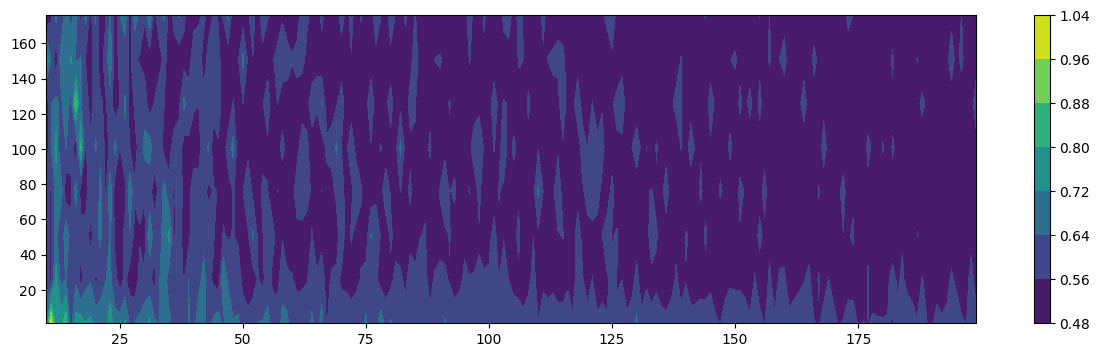

In [328]:
arr = np.array(tmp)

# Sample data
data = arr

df = pd.DataFrame(arr[:, :3], columns=['x', 'y', 'z'])
y = list(df.groupby('y').count().index)
x = list(df.groupby('x').count().index)
z = np.zeros(shape=(len(x), len(y)))
for i, x_ in enumerate(x):
    for j, y_ in enumerate(y):
        v = df[(df.x==x_) & (df.y==y_)]
        v = v.iloc[-1].iloc[-1]
        z[i, j] = v
        
plt.figure(figsize=(15, 4))
extent = (np.min(x), np.max(x), np.min(y), np.max(y))
f = plt.contourf(z.transpose(), extent=extent)
plt.colorbar(f)

In [239]:
arr.shape

(360, 3)

In [241]:
df = pd.DataFrame(arr, columns=['x', 'y', 'z'])
y = list(df.groupby('y').count().index)
x = list(df.groupby('x').count().index)
z = np.zeros(shape=(len(x), len(y)))
for i, x_ in enumerate(x):
    for j, y_ in enumerate(y):
        v = df[(df.x==x_) & (df.y==y_)]
        v = v.iloc[-1].iloc[-1]
        z[i, j] = v

In [242]:
n = np.floor(np.sqrt(len(df)))

In [243]:
df

,x,y,z
0,101.0,10.0,0.663366
1,126.0,10.0,0.571429
2,151.0,10.0,0.596026
3,176.0,10.0,0.568182
4,201.0,10.0,0.567164
...,...,...,...
355,876.0,910.0,0.509132
356,901.0,910.0,0.520533
357,926.0,910.0,0.520518
358,951.0,910.0,0.539432


In [244]:
y = list(df.groupby('y').count().index)
x = list(df.groupby('x').count().index)
z = np.zeros(shape=(len(x), len(y)))
for i, x_ in enumerate(x):
    for j, y_ in enumerate(y):
        v = df[(df.x==x_) & (df.y==y_)]
        v = v.iloc[-1].iloc[-1]
        z[i, j] = v

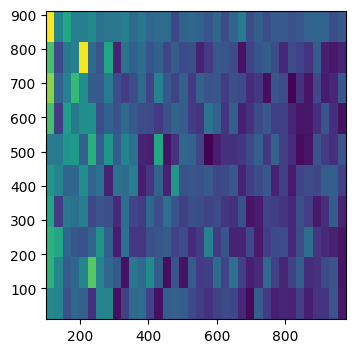

In [245]:

plt.figure(figsize=(10, 4))
extent = (np.min(x), np.max(x), np.min(y), np.max(y))
plt.imshow(z.transpose(), extent=extent)

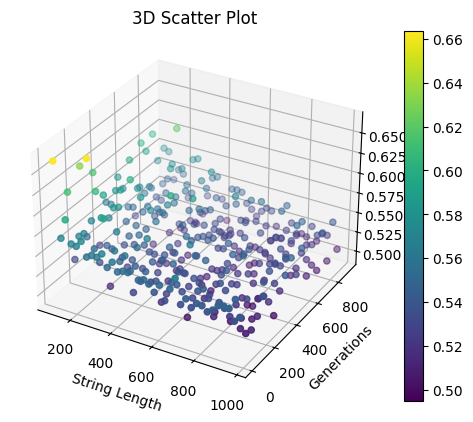

In [246]:
import numpy as np
import matplotlib.pyplot as plt00
from mpl_toolkits.mplot3d import Axes3D

# Sample data
data = arr

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
f = ax.scatter(data[:,0], data[:,1], data[:,2], c=data[:,2])
plt.colorbar(f)
# Set labels and title
ax.set_xlabel('String Length')
ax.set_ylabel('Generations')
ax.set_zlabel('Fitness')
ax.set_title('3D Scatter Plot')

plt.show()
